# 1. Importation des librairies

In [ ]:

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path = "/content/drive/MyDrive/pythonprog/Fraud.csv"
Data_lg = pd.read_csv(path)
Data_lg


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# Échantillonnage aléatoire de 40 000 lignes
Data_l = Data_lg.sample(n=100000, random_state=42)  # fixez la graine pour la reproductibilité

In [ ]:
Data_l

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


In [ ]:
# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

In [ ]:
!pip install tensorflow


In [ ]:

Data_lg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
Data_lg.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# 2. Data cleaning

In [ ]:
#count missing values
Data_lg.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#count nber of duplicate rows

Data_lg.duplicated().sum()

0

# 3. Analyse Exploratoire des Donnees

In [ ]:
#count fraud and no fraud values

counts = Data_lg['isFraud'].value_counts()
print(counts)

0    6354407
1       8213
Name: isFraud, dtype: int64


In [ ]:

Data_lg.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:

# Exclusion de la colonne "isFraud" de l'analyse des valeurs aberrantes
numeric_columns = Data_lg.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('isFraud')

Q1 = Data_lg[numeric_columns].quantile(0.25)
Q3 = Data_lg[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((Data_lg[numeric_columns] < lower_bound) | (Data_lg[numeric_columns] > upper_bound)).any(axis=1)

print(Data_lg[outliers])


         step      type      amount     nameOrig  oldbalanceOrg  \
14          1   PAYMENT     4098.78  C1026483832      503264.00   
37          1   PAYMENT     2791.42   C923341586      300481.00   
38          1   PAYMENT     7413.54  C1470868839      297689.58   
48          1  CASH_OUT     5346.89   C512549200           0.00   
62          1     DEBIT     8727.74   C166694583      882770.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
14            499165.22  M1635378213            0.00            0.00        0   
37            297689.58   M107994

Les résultats affichés montrent les lignes de votre ensemble de données qui contiennent au moins une valeur aberrante dans l'une de leurs colonnes numériques, en utilisant la méthode de l'interquartile (IQR) pour détecter les valeurs aberrantes. Voici comment interpréter ces résultats :

1. **Chaque ligne représente une observation :** Chaque ligne du résultat correspond à une transaction spécifique dans votre ensemble de données.

2. **Colonnes Numériques avec Valeurs Aberrantes :** Les colonnes qui ont contribué à qualifier ces lignes comme valeurs aberrantes sont les colonnes numériques que vous avez incluses dans l'analyse (à l'exclusion de la colonne "isFraud"). Ces colonnes sont celles pour lesquelles les valeurs sont en dehors de la plage [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

   - Dans votre cas, les colonnes numériques susceptibles d'avoir des valeurs aberrantes sont probablement : "step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", et "newbalanceDest".

3. **Interprétation des Résultats :** Par exemple, la première ligne affichée indique que pour la transaction avec "step" égal à 1 et "type" égal à "PAYMENT", la colonne "amount" contient une valeur aberrante (4098.78) en fonction de la plage définie par l'IQR.

   Vous pouvez maintenant examiner ces lignes individuellement pour comprendre pourquoi ces valeurs spécifiques sont considérées comme aberrantes. Cela peut nécessiter une compréhension plus approfondie du domaine ou une vérification des données sources pour confirmer si ces valeurs sont légitimes ou des erreurs.


La différence dans le nombre de lignes entre le jeu de données initial (1048575 lignes) et le jeu de données après l'analyse des valeurs aberrantes (331734 lignes) provient du processus de détection et de retrait des valeurs aberrantes.

Lorsque vous avez appliqué la méthode de l'interquartile (IQR) pour détecter les valeurs aberrantes, vous avez défini des seuils basés sur les quartiles (Q1 et Q3) et l'IQR. Les observations (lignes) dont les valeurs dans au moins l'une des colonnes numériques étaient en dehors de ces seuils ont été identifiées comme valeurs aberrantes et supprimées du jeu de données.

Cela signifie que les 331734 lignes restantes dans votre jeu de données sont celles qui ne contiennent pas de valeurs aberrantes selon les critères que vous avez définis. Ces lignes ont été conservées, tandis que les lignes contenant des valeurs aberrantes ont été exclues de l'analyse. C'est pourquoi la taille du jeu de données a été réduite de 1048575 à 331734 lignes après le retrait des valeurs aberrantes.

En résumé, le processus de détection et de suppression des valeurs aberrantes a permis de nettoyer le jeu de données en éliminant les observations qui se distinguaient significativement du reste des données selon les critères définis par la méthode IQR. Cela peut aider à améliorer la qualité des données utilisées pour l'analyse et la modélisation ultérieure en éliminant les valeurs potentiellement erronées ou anormales.

# 4- Encodage des variables categorielles

In [ ]:

#creation de la matrice de la variable independante

X = Data_l.iloc[:, [1,9]].values
y = Data_l.iloc[:, 9].values

In [ ]:
print("y = \t",y)


y = 	 [0 0 0 ... 0 0 0]


In [ ]:
print("X = \n",X, "\n\n")

X = 
 [['CASH_IN' 0]
 ['PAYMENT' 0]
 ['CASH_IN' 0]
 ...
 ['CASH_OUT' 0]
 ['CASH_IN' 0]
 ['PAYMENT' 0]] 




In [ ]:

# Creation of the Matrix of the independante variable (Y = B + AX) same that the previous one

X = Data_l.iloc[:, 1:-1].values
y = Data_l.iloc[:, -1].values

print("X = DataSet \n",X, "\n\n")

X = DataSet 
 [['CASH_IN' 330218.42 'C632336343' ... 452419.57 122201.15 0]
 ['PAYMENT' 11647.08 'C1264712553' ... 0.0 0.0 0]
 ['CASH_IN' 152264.21 'C1746846248' ... 201303.01 49038.8 0]
 ...
 ['CASH_OUT' 141519.24 'C387888280' ... 12853274.23 12994793.47 0]
 ['CASH_IN' 635412.68 'C1458432906' ... 0.0 0.0 0]
 ['PAYMENT' 31617.57 'C1314607150' ... 0.0 0.0 0]] 




**a- Normalisation des donnees**

In [ ]:


from sklearn.preprocessing import LabelEncoder

label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()

In [ ]:

# The type
X[:, 0] = label_encoder_type.fit_transform(X[:, 0])


In [ ]:
# The nameOrig
X[:, 2] = label_encoder_nameOrig.fit_transform(X[:, 2])


In [ ]:
# The nameDest
X[:, 5] = label_encoder_nameDest.fit_transform(X[:, 5])

In [ ]:
X.shape

(100000, 9)

**b- encodage avec oneHot encoder**

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# The type
onehotencoder_type = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

X = np.array(onehotencoder_type.fit_transform(X))

In [ ]:
# The nameOrig
onehotencoder_nameOrig = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')

X = np.array(onehotencoder_nameOrig.fit_transform(X))

In [ ]:
# The nameOrig
onehotencoder_nameDest = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')

X = np.array(onehotencoder_nameDest.fit_transform(X))

In [ ]:
print("Pour X = Nouveau Jeu de donnees, nous avons \n", X , "\n\n")

Pour X = Nouveau Jeu de donnees, nous avons 
 [[1.0 0.0 1.0 ... 3446197.37 3416772.53 0]
 [1.0 0.0 1.0 ... 0.0 125122.34 0]
 [1.0 0.0 1.0 ... 428983.68 802453.21 0]
 ...
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 1.0 ... 0.0 0.0 0]] 




In [ ]:
X.shape

(100000, 15)

**c- Division du jeu de donnees**

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement (70%) et ensemble temporaire (30%)
X_train_temp, X_other, y_train_temp, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

# Diviser l'ensemble temporaire en ensemble de test (20%) et ensemble de validation (15%)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.33, random_state=42)

# Vérifier les tailles des ensembles
print("Taille de l'ensemble d'entraînement :", len(X_train_temp))
print("Taille de l'ensemble de test :", len(X_test))
print("Taille de l'ensemble de validation :", len(X_val))


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: ignored

**d- Mise a l'echelle (Feature scaling)**

In [ ]:
# #change the scale of variables to avoid one variable dominating the other

# from sklearn.preprocessing import StandardScaler
# dsc = StandardScaler()
# X_train = dsc.fit_transform(X_train)
# X_test = dsc.transform(X_test)


from sklearn.preprocessing import StandardScaler

# Normaliser l'ensemble d'entraînement
scaler = StandardScaler()
X_train_temp_scaled = scaler.fit_transform(X_train_temp)

# Normaliser l'ensemble de test
X_test_scaled = scaler.transform(X_test)

# Normaliser l'ensemble de validation
X_val_scaled = scaler.transform(X_val)

In [ ]:

my_array = X
my_array.shape

df_new = pd.DataFrame(my_array, columns=['type', 'amount', 'nameOrig', 'oldbalanceOrg',
                                         'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
                                         'isFraud', 'colone_10', 'colone_11', 'colone_12', 'colone_13', 'colone_14',
                                         'colone_15'])

print(df_new)

        type amount nameOrig oldbalanceOrg newbalanceOrig nameDest  \
0        1.0    0.0      1.0           0.0            0.0      0.0   
1        1.0    0.0      1.0           0.0            0.0      0.0   
2        0.0    1.0      1.0           0.0            0.0      0.0   
3        1.0    0.0      1.0           0.0            0.0      1.0   
4        1.0    0.0      1.0           0.0            0.0      0.0   
...      ...    ...      ...           ...            ...      ...   
6362615  1.0    0.0      1.0           0.0            0.0      1.0   
6362616  0.0    1.0      1.0           0.0            0.0      0.0   
6362617  1.0    0.0      1.0           0.0            0.0      1.0   
6362618  0.0    1.0      1.0           0.0            0.0      0.0   
6362619  1.0    0.0      1.0           0.0            0.0      1.0   

        oldbalanceDest newbalanceDest  isFraud   colone_10  colone_11  \
0                  1.0        9839.64   757869    170136.0  160296.36   
1            

In [ ]:
# Définition des données d'entrainements et de tests(1/100)

# Test_data = df_new.sample(frac=0.01)

In [ ]:
#Test_data

# 5-Creation des Modeles
**a- Forets Aleatoires**

In [ ]:
Data_l

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Détermination du nombre de voisins pour SMOTE
minority_class_count = y_train.value_counts().min()
smote_neighbors = max(min(minority_class_count - 1, 5), 1)  # 5 est le défaut de SMOTE, 1 est le minimum

# Création du pipeline avec SMOTE et RandomForestClassifier
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Entraîner le pipeline sur l'ensemble d'entraînement transformé
pipeline.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble de validation transformé avec des probabilités
y_val_probs = pipeline.predict_proba(X_val_transformed)[:, 1]

# Choisir un seuil de décision qui maximise la sensibilité et la spécificité
threshold = 0.5  # Ajustez ce seuil en fonction de vos besoins spécifiques
y_val_pred = (y_val_probs >= threshold).astype(int)

# Évaluation du modèle avec le seuil ajusté sur l'ensemble de validation
accuracy_val = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_probs)
print("Précision du modèle avec seuil ajusté sur l'ensemble de validation :", accuracy_val)
print("AUC-ROC sur l'ensemble de validation :", roc_auc)
print("Rapport de classification sur l'ensemble de validation :\n", classification_report(y_val, y_val_pred))

Précision du modèle avec seuil ajusté sur l'ensemble de validation : 0.9993
AUC-ROC sur l'ensemble de validation : 0.9443926854739493
Rapport de classification sur l'ensemble de validation :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       1.00      0.50      0.67        28

    accuracy                           1.00     20000
   macro avg       1.00      0.75      0.83     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Détermination du nombre de voisins pour SMOTE
minority_class_count = y_train.value_counts().min()
smote_neighbors = max(min(minority_class_count - 1, 5), 1)  # 5 est le défaut de SMOTE, 1 est le minimum

# Création du pipeline avec SMOTE et RandomForestClassifier
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Entraîner le pipeline sur l'ensemble d'entraînement transformé
pipeline.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble d'entraînement et de test transformé avec des probabilités
y_train_probs = pipeline.predict_proba(X_train_transformed)[:, 1]
y_test_probs = pipeline.predict_proba(X_test_transformed)[:, 1]

# Choisir un seuil de décision qui maximise la sensibilité et la spécificité
threshold = 0.5  # Ajustez ce seuil en fonction de vos besoins spécifiques
y_train_pred = (y_train_probs >= threshold).astype(int)
y_test_pred = (y_test_probs >= threshold).astype(int)

# Évaluation du modèle avec le seuil ajusté sur l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_probs)
print("Précision du modèle avec seuil ajusté sur l'ensemble d'entraînement :", accuracy_train)
print("AUC-ROC sur l'ensemble d'entraînement :", roc_auc_train)
print("Rapport de classification sur l'ensemble d'entraînement :\n", classification_report(y_train, y_train_pred))

# Évaluation du modèle avec le seuil ajusté sur l'ensemble de test
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_probs)
print("\nPrécision du modèle avec seuil ajusté sur l'ensemble de test :", accuracy_test)
print("AUC-ROC sur l'ensemble de test :", roc_auc_test)
print("Rapport de classification sur l'ensemble de test :\n", classification_report(y_test, y_test_pred))


Précision du modèle avec seuil ajusté sur l'ensemble d'entraînement : 1.0
AUC-ROC sur l'ensemble d'entraînement : 1.0
Rapport de classification sur l'ensemble d'entraînement :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     79887
           1       1.00      1.00      1.00       113

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Précision du modèle avec seuil ajusté sur l'ensemble de test : 0.9993
AUC-ROC sur l'ensemble de test : 0.9443926854739493
Rapport de classification sur l'ensemble de test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       1.00      0.50      0.67        28

    accuracy                           1.00     20000
   macro avg       1.00      0.75      0.83     20000
weighted avg       1.00      1.00      1.00     2

**Validation croisee**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import pandas as pd

# Votre code pour la préparation des données (X, y) reste inchangé

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Création du pipeline complet avec prétraitement, SMOTE et modèle Random Forest
pipeline = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Configuration de la validation croisée
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Précision moyenne du modèle Random Forest avec validation croisée :", scores.mean())

Précision moyenne du modèle Random Forest avec validation croisée : 0.99931


**b- SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import pandas as pd

# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Création du pipeline avec SMOTE et SVM
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Entraîner le pipeline sur l'ensemble d'entraînement transformé
pipeline.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble de validation transformé
y_val_pred = pipeline.predict(X_val_transformed)

# Évaluation du modèle SVM sur l'ensemble de validation
accuracy_val_svm = accuracy_score(y_val, y_val_pred)
print("Précision du modèle SVM sur l'ensemble de validation :", accuracy_val_svm)
print("Rapport de classification sur l'ensemble de validation :\n", classification_report(y_val, y_val_pred))

Précision du modèle SVM sur l'ensemble de validation : 0.99885
Rapport de classification sur l'ensemble de validation :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       0.86      0.21      0.34        28

    accuracy                           1.00     20000
   macro avg       0.93      0.61      0.67     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
#affiche resultat

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import pandas as pd

# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Création du pipeline avec SMOTE et SVM
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Entraîner le pipeline sur l'ensemble d'entraînement transformé
pipeline.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble d'entraînement et de test transformé
y_train_pred = pipeline.predict(X_train_transformed)
y_test_pred = pipeline.predict(X_test_transformed)

# Évaluation du modèle SVM sur l'ensemble d'entraînement
accuracy_train_svm = accuracy_score(y_train, y_train_pred)
print("Précision du modèle SVM sur l'ensemble d'entraînement :", accuracy_train_svm)
print("Rapport de classification sur l'ensemble d'entraînement :\n", classification_report(y_train, y_train_pred))

# Évaluation du modèle SVM sur l'ensemble de test
accuracy_test_svm = accuracy_score(y_test, y_test_pred)
print("\nPrécision du modèle SVM sur l'ensemble de test :", accuracy_test_svm)
print("Rapport de classification sur l'ensemble de test :\n", classification_report(y_test, y_test_pred))


Précision du modèle SVM sur l'ensemble d'entraînement : 1.0
Rapport de classification sur l'ensemble d'entraînement :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     79887
           1       1.00      1.00      1.00       113

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Précision du modèle SVM sur l'ensemble de test : 0.99885
Rapport de classification sur l'ensemble de test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       0.86      0.21      0.34        28

    accuracy                           1.00     20000
   macro avg       0.93      0.61      0.67     20000
weighted avg       1.00      1.00      1.00     20000



***Validation croisee***

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import pandas as pd

# Votre code pour la préparation des données (X, y) reste inchangé

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Création du pipeline complet avec prétraitement, SMOTE et modèle SVM
pipeline = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Configuration de la validation croisée
# Remarque : Nous utilisons ici 5 plis pour la validation croisée, mais ce nombre peut être ajusté
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Précision moyenne du modèle SVM avec validation croisée :", scores.mean())

Précision moyenne du modèle SVM avec validation croisée : 0.99896


**Matrice de Confusion**

In [ ]:

# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute the confusion matrix for the test set
# conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# # Display the confusion matrix using seaborn heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", cbar=False,
#             xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
# plt.title('Confusion Matrix - SVM (Test Set)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


**C- Arbre de decision**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Modèle Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement transformé
decision_tree_model.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble de validation
y_pred_val_dt = decision_tree_model.predict(X_val_transformed)

# Évaluation du modèle Decision Tree sur l'ensemble de validation
accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
print("Précision du modèle Decision Tree sur l'ensemble de validation :", accuracy_val_dt)
print("Rapport de classification sur l'ensemble de validation :\n", classification_report(y_val, y_pred_val_dt))

Précision du modèle Decision Tree sur l'ensemble de validation : 0.9985666666666667
Rapport de classification sur l'ensemble de validation :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29958
           1       0.33      0.02      0.04        42

    accuracy                           1.00     30000
   macro avg       0.67      0.51      0.52     30000
weighted avg       1.00      1.00      1.00     30000



In [ ]:
#affichage des 2 resultats


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Séparation des variables explicatives et de la variable cible
X = Data_l.drop("isFraud", axis=1)
y = Data_l["isFraud"]

# Identifier les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Appliquer la transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Modèle Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement transformé
decision_tree_model.fit(X_train_transformed, y_train)

# Prédictions sur l'ensemble d'entraînement
y_pred_train_dt = decision_tree_model.predict(X_train_transformed)

# Évaluation du modèle Decision Tree sur l'ensemble d'entraînement
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print("Précision du modèle Decision Tree sur l'ensemble d'entraînement :", accuracy_train_dt)
print("Rapport de classification sur l'ensemble d'entraînement :\n", classification_report(y_train, y_pred_train_dt))

# Prédictions sur l'ensemble de validation
y_pred_val_dt = decision_tree_model.predict(X_val_transformed)

# Évaluation du modèle Decision Tree sur l'ensemble de validation
accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
print("\nPrécision du modèle Decision Tree sur l'ensemble de validation :", accuracy_val_dt)
print("Rapport de classification sur l'ensemble de validation :\n", classification_report(y_val, y_pred_val_dt))



Précision du modèle Decision Tree sur l'ensemble d'entraînement : 1.0
Rapport de classification sur l'ensemble d'entraînement :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     69901
           1       1.00      1.00      1.00        99

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000


Précision du modèle Decision Tree sur l'ensemble de validation : 0.9985666666666667
Rapport de classification sur l'ensemble de validation :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29958
           1       0.33      0.02      0.04        42

    accuracy                           1.00     30000
   macro avg       0.67      0.51      0.52     30000
weighted avg       1.00      1.00      1.00     30000



**Validation Croisee**

In [ ]:



from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import pandas as pd

# Votre code pour la préparation des données (X, y) reste inchangé

# Transformer pour l'encodage one-hot des variables catégorielles et la normalisation pour les autres
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ])

# Création du pipeline complet avec prétraitement, SMOTE et modèle Decision Tree
pipeline = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Configuration de la validation croisée
# Remarque : Nous utilisons ici 5 plis pour la validation croisée, mais ce nombre peut être ajusté
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Précision moyenne du modèle Decision Tree avec validation croisée :", scores.mean())

Précision moyenne du modèle Decision Tree avec validation croisée : 0.9962899999999999


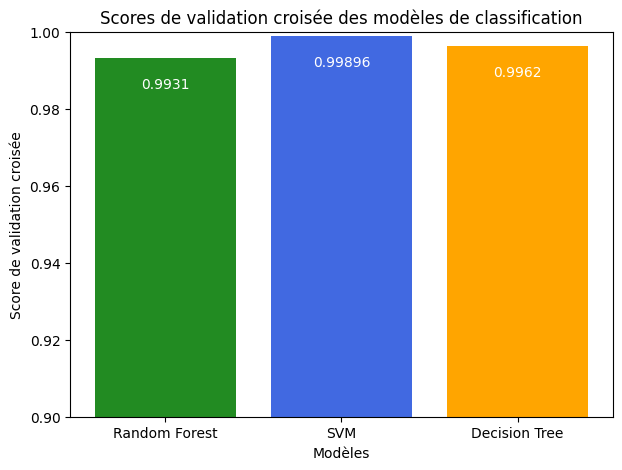

In [ ]:
import matplotlib.pyplot as plt

# Données des modèles
models = ['Random Forest', 'SVM', 'Decision Tree']
cross_val_scores = [0.9931, 0.99896, 0.9962]

# Création du graphique en barres
plt.figure(figsize=(7, 5))
bars = plt.bar(models, cross_val_scores, color=['forestgreen', 'royalblue', 'orange'])

# Ajout de titres et d'étiquettes
plt.title('Scores de validation croisée des modèles de classification')
plt.xlabel('Modèles')
plt.ylabel('Score de validation croisée')
plt.ylim(0.90, 1.00)  # Ajustez la limite sur l'axe y si nécessaire

# Afficher les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.005, round(yval, 5), ha='center', va='top', color='white')

# Montrer le graphique
plt.show()


In [ ]:


# Importation des bibliothèques nécessaires
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np

# Monter Google Drive
drive.mount('/content/drive')

# Chemin vers le modèle sur Google Drive
model_path = '/content/drive/MyDrive/pythonprog/model.h5'

# Charger le modèle
model = load_model(model_path)

# Seuil pour la détection de fraude
seuil_fraude = 0.3



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# dictionnaire avec 20 transactions fictives
donnees_de_test = {
    "transaction_1": [0.1, 2000.0, 5000.0, 3000.0, 5000.0, 7000.0, 12000.0, 0, 1, 0, 1, 0, 1, 0, 1],
    "transaction_2": [0.2, 3000.0, 7000.0, 4000.0, 7000.0, 10000.0, 17000.0, 1, 0, 1, 0, 1, 0, 1, 0],
    "transaction_3": [0.3, 1500.0, 4000.0, 2500.0, 4000.0, 6500.0, 10500.0, 0, 1, 0, 1, 1, 0, 1, 0],
    "transaction_4": [0.4, 4000.0, 8000.0, 4000.0, 8000.0, 12000.0, 20000.0, 1, 0, 1, 0, 0, 1, 0, 1],
    "transaction_5": [0.5, 1000.0, 3000.0, 2000.0, 3000.0, 5000.0, 8000.0, 0, 1, 1, 0, 1, 0, 1, 0],
    "transaction_6": [0.6, 3500.0, -27500.0, 4000.0, 7500.0, -11500.0, -19000.0, 1, 0, 1, 0, 0, 1, 1, 0],
    "transaction_7": [0.7, 2800.0, 6800.0, 4000.0, 6800.0, 10800.0, 17600.0, 0, 1, 0, 1, 1, 1, 0, 1],
    "transaction_8": [0.8, 4600.0, 8600.0, 4000.0, 8600.0, 12600.0, 22200.0, 1, 0, 0, 1, 0, 1, 1, 0],
    "transaction_9": [0.9, 1200.0, 5200.0, 4000.0, 5200.0, 9200.0, 13200.0, 0, 1, 1, 0, 1, 0, 1, 1],
    "transaction_10": [1.0, 2000.0, 6000.0, 4000.0, 6000.0, 10000.0, 16000.0, 1, 0, 0, 1, 1, 1, 0, 0],
    "transaction_11": [1.1, 2400.0, 6400.0, 4000.0, 6400.0, 10400.0, 16800.0, 0, 1, 1, 0, 0, 1, 1, 1],
    "transaction_12": [1.2, 3000.0, 7000.0, 4000.0, 7000.0, 11000.0, 18000.0, 1, 0, 1, 0, 1, 1, 0, 1],
    "transaction_13": [1.3, 1500.0, 5500.0, 4000.0, 5500.0, 9500.0, 14000.0, 0, 1, 0, 1, 1, 0, 1, 0],
    "transaction_14": [1.4, 3200.0, 7200.0, 4000.0, 7200.0, -11200.0, -18400.0, 1, 0, 0, 1, 0, 1, 0, 1],
    "transaction_15": [1.5, 1800.0, 5800.0, 4000.0, 5800.0, 9800.0, 14800.0, 0, 1, 1, 0, 1, 0, 1, 1],
    "transaction_16": [1.6, 2200.0, 6200.0, 4000.0, 6200.0, 10200.0, 16400.0, 1, 0, 1, 0, 1, 1, 1, 0],
    "transaction_17": [1.7, 2600.0, 6600.0, 4000.0, 6600.0, -10600.0, 17200.0, 0, 1, 0, 1, 0, 1, 1, 1],
    "transaction_18": [1.8, 2900.0, 6900.0, 4000.0, 6900.0, 10900.0, 17800.0, 1, 0, 0, 1, 1, 0, 1, 0],
    "transaction_19": [1.9, -33100.0, 7100.0, 4000.0, 7100.0, -11100.0, 18200.0, 0, 1, 1, 0, 0, 1, 1, 0],
    "transaction_20": [2.0, 3400.0, 7400.0, 4000.0, 7400.0, 11400.0, 18800.0, 1, 0, 1, 0, 1, 0, 1, 1]
}

In [ ]:

# Conversion des données de test en tableau NumPy
donnees_np = np.array(list(donnees_de_test.values()))

# Faire des prédictions sur les données de test
predictions = model.predict(donnees_np)

# Affichage des prédictions pour chaque transaction
for i, pred in enumerate(predictions, 1):
    probabilite_fraude = pred[0]
    is_fraudulent = probabilite_fraude > seuil_fraude
    print(f"Transaction {i}: Probabilité de fraude = {probabilite_fraude}, Frauduleuse ? = {is_fraudulent}")

1/1 [==============================] - 0s 77ms/step
Transaction 1: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 2: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 3: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 4: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 5: Probabilité de fraude = 0.09076989442110062, Frauduleuse ? = False
Transaction 6: Probabilité de fraude = 0.3969891667366028, Frauduleuse ? = True
Transaction 7: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 8: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 9: Probabilité de fraude = 0.09077004343271255, Frauduleuse ? = False
Transaction 10: Probabilité de fraude = 0.09076989442110062, Frauduleuse ? = False
Transaction 11: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 12: Probabilité de fraude = 0.0, Frauduleuse ? = False
Transaction 13: Probabilité de fraude = 0.09076989442110062, Frauduleuse ? = False
Transact